In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv(r'C:\Users\Rajashri\Desktop\Projects\Rajashri (Intern Project)\Weekly_Food_Retail_Prices.csv')

print(sales.shape)
sales.head(3)

(5044923, 8)


,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Chittoor,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
1,Andhra Pradesh,Guntur,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN
2,Andhra Pradesh,Kurnool,Apple,Delicious medium size,Kg.,Food,05/01/2001,NaN


In [4]:
sales.isnull().sum()

State                 0
Centre                0
Commodity             0
Variety          890838
Unit                  0
Category              0
Date                  0
Retail Price    2993169
dtype: int64

In [5]:
sales.describe()

,Retail Price
count,2.051754e+06
mean,8.385372e+01
std,1.486131e+02
min,-4.500000e+01
25%,1.900000e+01
50%,3.800000e+01
75%,8.500000e+01
max,2.004500e+04


In [6]:
centre_mode = sales.pivot_table(values='Centre', columns='State', aggfunc=(lambda x: x.mode()[0]))
centre_mode

State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu Kashmir,Jharkhand,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal
Centre,Chittoor,Itanagar,Dispur,Patna,Panaji,Gandhi Nagar,Hissar,Shimla,Jammu,Dhanbad,...,Amritsar,Dausa,Gangtok,Chennai,Hyderabad,Agartala,Pondicherry,Agra,Haldwani,Asansol


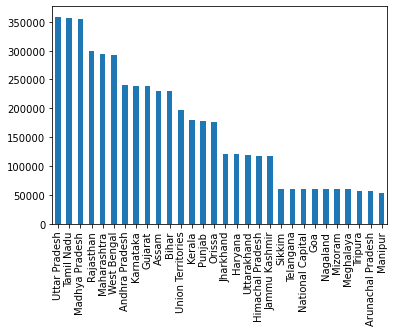

In [7]:
# check the difference in aggregate sales across states
sales['State'].value_counts().plot(kind='bar')
plt.show()

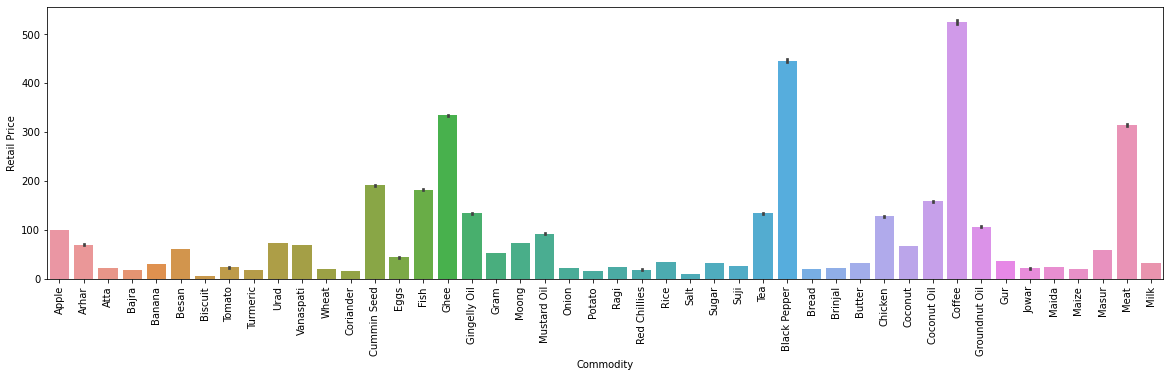

In [8]:
plt.figure(figsize=(20,5))
sns.barplot(x=sales['Commodity'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

In [9]:
# Drop off irrelevant columns
sales.drop(['Centre', 'Variety'], axis=1, inplace=True)
sales.head(3)

,State,Commodity,Unit,Category,Date,Retail Price
0,Andhra Pradesh,Apple,Kg.,Food,05/01/2001,NaN
1,Andhra Pradesh,Apple,Kg.,Food,05/01/2001,NaN
2,Andhra Pradesh,Apple,Kg.,Food,05/01/2001,NaN


In [10]:
# check unique values in dataset
sales.apply(lambda x: len(x.unique()))

State             30
Commodity         46
Unit              11
Category           1
Date            1053
Retail Price    2097
dtype: int64

In [11]:
# check for categorical columns
cat_col = []
for x in sales.dtypes.index:
    if sales.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['State', 'Commodity', 'Unit', 'Category', 'Date']

In [12]:
comm = sales['Commodity']
comm.head(3)

0    Apple
1    Apple
2    Apple
Name: Commodity, dtype: object

In [13]:
cat = sales['Category']
cat.head(3)

0    Food
1    Food
2    Food
Name: Category, dtype: object

In [14]:
df = pd.DataFrame()
df['Commodity'] = comm
df['Category'] = cat

# Create DataFrame
dff = pd.DataFrame()
dff['Dummy'] = df['Commodity'] + " " +  df['Category'].astype(str)
print(dff)

              Dummy
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [15]:
# Remove the 'Category' column
sales.drop(['Category'], axis=1, inplace=True)
sales.head(3)

,State,Commodity,Unit,Date,Retail Price
0,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN
1,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN
2,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN


In [16]:
dff.rename(columns = {'Dummy':'Category'}, inplace = True)
print(dff)

           Category
0        Apple Food
1        Apple Food
2        Apple Food
3        Apple Food
4        Apple Food
...             ...
5044918   Milk Food
5044919   Milk Food
5044920   Milk Food
5044921   Milk Food
5044922   Milk Food

[5044923 rows x 1 columns]


In [17]:
sales = pd.concat([sales, dff], axis=1)
sales.head(3)

,State,Commodity,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Apple Food
1,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Apple Food
2,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Apple Food


In [18]:
# After extracting and joining the 2 columns, we need to define the category
def category(x):
    if x == 'Apple Food' or x == 'Banana Food' or x == 'Coconut Food':
        return 'Fruits'
    elif x == 'Fish Food':
        return 'Fish'
    elif x == 'Meat Food' or x == 'Chicken Food':
        return 'Meat'
    elif x == 'Milk Food' or x == 'Butter Food' or x == 'Ghee Food':
        return 'Milk products'
    elif x == 'Potato Food' or x == 'Onion Food' or x == 'Brinjal Food' or x == 'Red Chillies Food' or x == 'Coriander Food' or x == 'Tomato Food':
        return 'Vegetables'
    elif x == 'Mustard Oil Food' or x == 'Groundnut Oil Food' or x == 'Coconut Oil Food' or x == 'Gingelly Oil Food':
        return 'Oil'
    elif x == 'Salt Food' or x == 'Sugar Food' or x == 'Gur Food' or x == 'Black Pepper Food' or x == 'Turmeric Food' or x == 'Cumin Seed Food':
        return 'Spices'
    elif x == 'Coffee Food' or x == 'Tea Food':
        return 'Beverages'
    elif x == 'Moong Food' or x == 'Urad Food' or x == 'Masur Food' or x == 'Arhar Food':
        return 'Dal'
    elif x == 'Jowar Food' or x == 'Maida Food' or x == 'Atta Food' or x == 'Wheat Food' or x == 'Bajra Food' or x == 'Ragi Food' or x == 'Maize Food':
        return 'Flour'
    else:
        return 'Misc'

sales['Category'] = sales['Category'].apply(lambda x: category(x))

In [19]:
sales.head(5)

,State,Commodity,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Fruits
1,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Fruits
2,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Fruits
3,Andhra Pradesh,Apple,Kg.,05/01/2001,NaN,Fruits
4,Arunachal Pradesh,Apple,Kg.,05/01/2001,NaN,Fruits


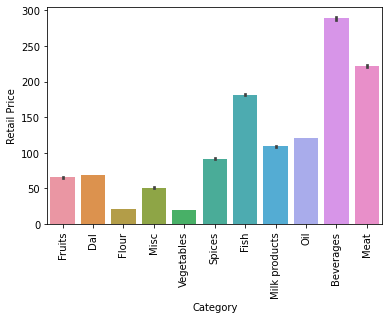

In [20]:
sns.barplot(x=sales['Category'], y=sales['Retail Price'])
plt.xticks(rotation="vertical")
plt.show()

In [21]:
# Get the average price of commodities per state
def mean_retail(a, b):
    x = (sales['State'] == a)
    y = (sales['Commodity'] == b)
    
    s2 = sales[x & y & (sales['Retail Price'] > 0)]
    return s2['Retail Price'].mean()

In [22]:
commodities = ['Apple', 'Arhar', 'Atta', 'Bajra', 'Banana', 'Besan', 'Biscuit', 'Tomato', 'Turmeric', 'Urad', 'Vanaspati', 'Wheat', 'Coriander', 'Cummin Seed', 'Eggs', 'Fish', 'Ghee', 'Gingelly Oil', 'Gram', 'Moong', 'Mustard Oil', 'Onion', 'Potato', 'Ragi', 'Red Chillies', 'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Black Pepper', 'Bread', 'Brinjal', 'Butter', 'Chicken', 'Coconut', 'Coconut Oil', 'Coffee', 'Groundnut Oil', 'Gur', 'Jowar', 'Maida', 'Maize', 'Masur', 'Meat', 'Milk']
states = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',  'National Capital', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',  'Tamil Nadu', 'Telangana', 'Tripura', 'Union Territories',  'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
def comm_prices(x, y):
    for state in states:
        for commodity in commodities:
            return mean_retail(x, y)

In [23]:
# Calling the func with custom values
comm_prices("Bihar", "Apple")

82.38476755687438

In [24]:
comm_prices("Assam", "Apple")

114.86101694915254

In [25]:
sales.isnull().sum()

State                 0
Commodity             0
Unit                  0
Date                  0
Retail Price    2993169
Category              0
dtype: int64

In [26]:
# There are 2993169 missing values in 'Retail Price', so fill it
sales['Retail Price'] = sales['Retail Price'].fillna(sales['Retail Price'].median())

In [27]:
sales.head(500)

,State,Commodity,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Apple,Kg.,05/01/2001,38.0,Fruits
1,Andhra Pradesh,Apple,Kg.,05/01/2001,38.0,Fruits
2,Andhra Pradesh,Apple,Kg.,05/01/2001,38.0,Fruits
3,Andhra Pradesh,Apple,Kg.,05/01/2001,38.0,Fruits
4,Arunachal Pradesh,Apple,Kg.,05/01/2001,38.0,Fruits
...,...,...,...,...,...,...
495,West Bengal,Besan,Kg.,05/01/2001,38.0,Misc
496,West Bengal,Besan,Kg.,05/01/2001,38.0,Misc
497,West Bengal,Besan,Kg.,05/01/2001,38.0,Misc
498,West Bengal,Besan,Kg.,05/01/2001,38.0,Misc


In [28]:
sales['Retail Price'].unique()

array([  38. ,   24. ,   19. , ..., 1133. ,   91.5,  746. ])

In [29]:
sales['Unit'].unique()

array(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg',
       '250gm. Pkt', '400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'],
      dtype=object)

In [30]:
sales['Unit'].replace(['Kg.', 'Dozen', '80gm. Pkt', '100gm. Pkt', 'Kg/Litre', 'Kg', '250gm. Pkt','400/800 Gm', 'Peice', '500gm. Pkt', 'Litre'], [1, 1, 0.08, 0.1, 1, 1, 0.25, 0.5, 1, 0.5, 1], inplace=True)

In [32]:
sales.head(10)

,State,Commodity,Unit,Date,Retail Price,Category
0,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits
1,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits
2,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits
3,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits
4,Arunachal Pradesh,Apple,1.0,05/01/2001,38.0,Fruits
5,Assam,Apple,1.0,05/01/2001,38.0,Fruits
6,Assam,Apple,1.0,05/01/2001,38.0,Fruits
7,Assam,Apple,1.0,05/01/2001,38.0,Fruits
8,Assam,Apple,1.0,05/01/2001,38.0,Fruits
9,Bihar,Apple,1.0,05/01/2001,38.0,Fruits


In [33]:
# analysing the 'Date' column
sales['Date'].value_counts()

05/01/2001    4791
11/04/2014    4791
25/04/2014    4791
02/05/2014    4791
09/05/2014    4791
              ... 
02/11/2007    4791
09/11/2007    4791
16/11/2007    4791
23/11/2007    4791
05/03/2021    4791
Name: Date, Length: 1053, dtype: int64

In [34]:
# Create DataFrame
date = sales['Date']

df = pd.DataFrame()
df['date'] = date
print(df)

               date
0        05/01/2001
1        05/01/2001
2        05/01/2001
3        05/01/2001
4        05/01/2001
...             ...
5044918  05/03/2021
5044919  05/03/2021
5044920  05/03/2021
5044921  05/03/2021
5044922  05/03/2021

[5044923 rows x 1 columns]


In [35]:
# split column into multiple columns by delimiter 
df[['Date', 'Month', 'Year']] = df['date'].str.split('/', expand=True)
df

,date,Date,Month,Year
0,05/01/2001,05,01,2001
1,05/01/2001,05,01,2001
2,05/01/2001,05,01,2001
3,05/01/2001,05,01,2001
4,05/01/2001,05,01,2001
...,...,...,...,...
5044918,05/03/2021,05,03,2021
5044919,05/03/2021,05,03,2021
5044920,05/03/2021,05,03,2021
5044921,05/03/2021,05,03,2021


In [36]:
# creating a new dataframe
dff = pd.DataFrame()
dff['Month'] = df['Month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11','12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dff

,Month
0,1
1,1
2,1
3,1
4,1
...,...
5044918,3
5044919,3
5044920,3
5044921,3


In [37]:
sales = pd.concat([sales, dff], axis=1)
sales.head(3)

,State,Commodity,Unit,Date,Retail Price,Category,Month
0,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits,1
1,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits,1
2,Andhra Pradesh,Apple,1.0,05/01/2001,38.0,Fruits,1


In [38]:
# Remove the 'Date' column
sales.drop(['Date'], axis=1, inplace=True)
sales.head(3)

,State,Commodity,Unit,Retail Price,Category,Month
0,Andhra Pradesh,Apple,1.0,38.0,Fruits,1
1,Andhra Pradesh,Apple,1.0,38.0,Fruits,1
2,Andhra Pradesh,Apple,1.0,38.0,Fruits,1


In [39]:
# Grouping the rows and averaging the Retail Price
sales = sales.groupby(['State', 'Commodity', 'Category', 'Unit', 'Month'], axis=0, as_index=False).mean()

In [40]:
sales.head(50)

,State,Commodity,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Apple,Fruits,1.0,1,81.306452
1,Andhra Pradesh,Apple,Fruits,1.0,2,83.047059
2,Andhra Pradesh,Apple,Fruits,1.0,3,85.127778
3,Andhra Pradesh,Apple,Fruits,1.0,4,85.802941
4,Andhra Pradesh,Apple,Fruits,1.0,5,95.036517
5,Andhra Pradesh,Apple,Fruits,1.0,6,97.962209
6,Andhra Pradesh,Apple,Fruits,1.0,7,94.982955
7,Andhra Pradesh,Apple,Fruits,1.0,8,91.488889
8,Andhra Pradesh,Apple,Fruits,1.0,9,78.855882
9,Andhra Pradesh,Apple,Fruits,1.0,10,75.107955


C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


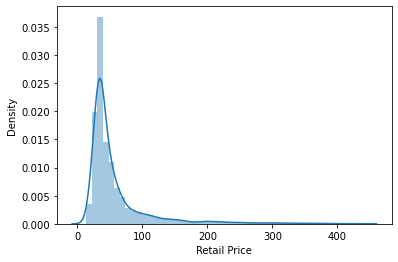

In [41]:
sns.distplot(sales['Retail Price'])
plt.show()

In [42]:
# Since it is skewed, we need to normalize it by applying Log Transformation
# In order to avoid infinite values, we add +1
sales['Retail Price'] = np.log(1+sales['Retail Price'])

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


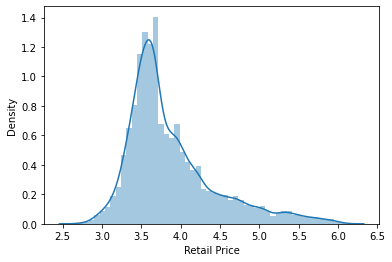

In [43]:
sns.distplot(sales['Retail Price'])
plt.show()

In [44]:
sales.isnull().sum()

State           0
Commodity       0
Category        0
Unit            0
Month           0
Retail Price    0
dtype: int64

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


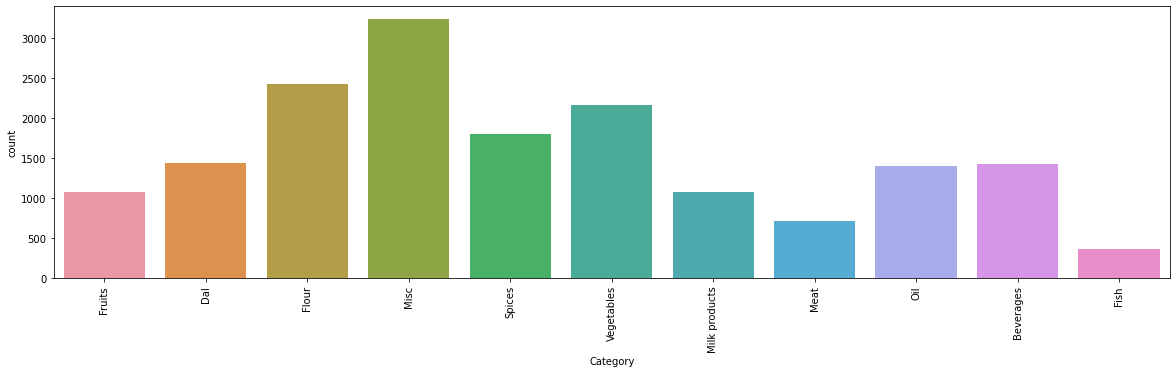

In [45]:
# Visualizing categorical values
plt.figure(figsize=(20,5))
sns.countplot(sales['Category'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


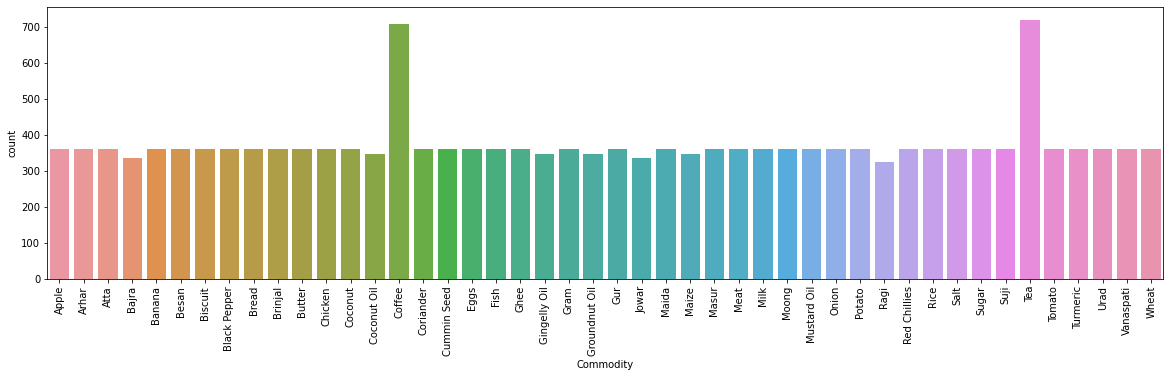

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(sales['Commodity'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Rajashri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


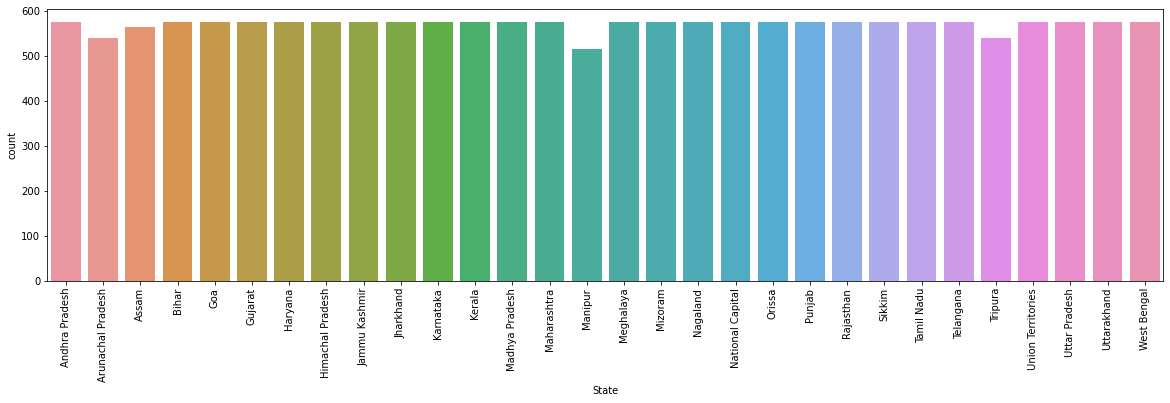

In [47]:
plt.figure(figsize=(20,5))
sns.countplot(sales['State'])
plt.xticks(rotation="vertical")
plt.show()

In [48]:
# Drop off 'Commodity' column as we have already categorised it
sales.drop(['Commodity'], axis=1, inplace=True)
sales.head(3)

,State,Category,Unit,Month,Retail Price
0,Andhra Pradesh,Fruits,1.0,1,4.410449
1,Andhra Pradesh,Fruits,1.0,2,4.431377
2,Andhra Pradesh,Fruits,1.0,3,4.455832


In [49]:
# One Hot Encoding -> new column for each category
category = pd.get_dummies(sales['Category'])
category.head(3)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Misc,Oil,Spices,Vegetables
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0


In [50]:
# To avoid dummy-variable trap, we should have 1 less dummies column
# If all categories are 0, it will mean 'Misc' is 1, so we can safely drop it
category = category.drop(['Misc'], axis='columns')
category.head(3)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0


In [51]:
state = pd.get_dummies(sales['State'], drop_first=True)
state.head(3)

,Arunachal Pradesh,Assam,Bihar,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu Kashmir,Jharkhand,Karnataka,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# concat it into our main dataset
sales = pd.concat([category, state, sales], axis='columns')
sales.head(5)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables,...,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal,State,Category,Unit,Month,Retail Price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,Fruits,1.0,1,4.410449
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,Fruits,1.0,2,4.431377
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,Fruits,1.0,3,4.455832
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,Fruits,1.0,4,4.463641
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,Andhra Pradesh,Fruits,1.0,5,4.564729


In [53]:
# Drop off the extra columns now
sales = sales.drop(['State', 'Category'], axis='columns')
sales.head(5)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables,...,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal,Unit,Month,Retail Price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,4.410449
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2,4.431377
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,3,4.455832
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,4,4.463641
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,5,4.564729


In [54]:
# check for categorical columns
cat_cols = []
for x in sales.dtypes.index:
    if sales.dtypes[x] == 'object':
        cat_cols.append(x)
cat_cols

[]

In [55]:
# check for null values
sales.isnull().sum()

Beverages            0
Dal                  0
Fish                 0
Flour                0
Fruits               0
Meat                 0
Milk products        0
Oil                  0
Spices               0
Vegetables           0
Arunachal Pradesh    0
Assam                0
Bihar                0
Goa                  0
Gujarat              0
Haryana              0
Himachal Pradesh     0
Jammu Kashmir        0
Jharkhand            0
Karnataka            0
Kerala               0
Madhya Pradesh       0
Maharashtra          0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
National Capital     0
Orissa               0
Punjab               0
Rajasthan            0
Sikkim               0
Tamil Nadu           0
Telangana            0
Tripura              0
Union Territories    0
Uttar Pradesh        0
Uttarakhand          0
West Bengal          0
Unit                 0
Month                0
Retail Price         0
dtype: int64

In [56]:
sales.head(3)

,Beverages,Dal,Fish,Flour,Fruits,Meat,Milk products,Oil,Spices,Vegetables,...,Tamil Nadu,Telangana,Tripura,Union Territories,Uttar Pradesh,Uttarakhand,West Bengal,Unit,Month,Retail Price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,4.410449
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,2,4.431377
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,3,4.455832


In [57]:
# Define the 'features' and 'labels'
X = sales.drop('Retail Price', axis='columns')
y = sales['Retail Price']

In [58]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [59]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [61]:
# evaluating our model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Score: ", r2_score(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

Score:  0.46239203071586266
Mean absolute error:  0.29039611893953243
Mean squared error:  0.17567712820685785


In [62]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred1 = regressor.predict(X_test)

In [63]:
# evaluating our regressor model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Score: ", r2_score(y_test, y_pred1))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred1))
print("Mean squared error: ", mean_squared_error(y_test, y_pred1))

Score:  0.32917902766294216
Mean absolute error:  0.2650176038137589
Mean squared error:  0.21920787766228444
